Saving Table 22.7 (1).txt to Table 22.7 (1) (5).txt

Raw file content (first 500 characters):
 Example 21.4
Six Month and Three Month
Treasury Bill Rates, USA, January 1982
to June 2001

GS3M = three month rate (%)
GS6M = six month rate (%)

obs	GS3M		GS6M		
				
1982:01	 12.92000	 13.90000		
1982:02	 14.28000	 14.81000		
1982:03	 13.31000	 13.83000		
1982:04	 13.34000	 13.87000		
1982:05	 12.71000	 13.13000		
1982:06	 13.08000	 13.76000		
1982:07	 11.86000	 12.80000		
1982:08	 9.000000	 10.51000		
1982:09	 8.190000	 9.830000		
1982:10	 7.970000	 8.630000		
1982:11	 8.

Columns detected: ['obs', 'GS3M', 'Unnamed: 2', 'GS6M', 'Unnamed: 4', 'Unnamed: 5']

Unfiltered DataFrame (first 5 rows):
        obs   GS3M  Unnamed: 2  GS6M  Unnamed: 4  Unnamed: 5
0      NaN    NaN         NaN   NaN         NaN         NaN
1  1982:01  12.92       13.90   NaN         NaN         NaN
2  1982:02  14.28       14.81   NaN         NaN         NaN
3  1982:03  13.31       13.83   NaN         NaN         NaN


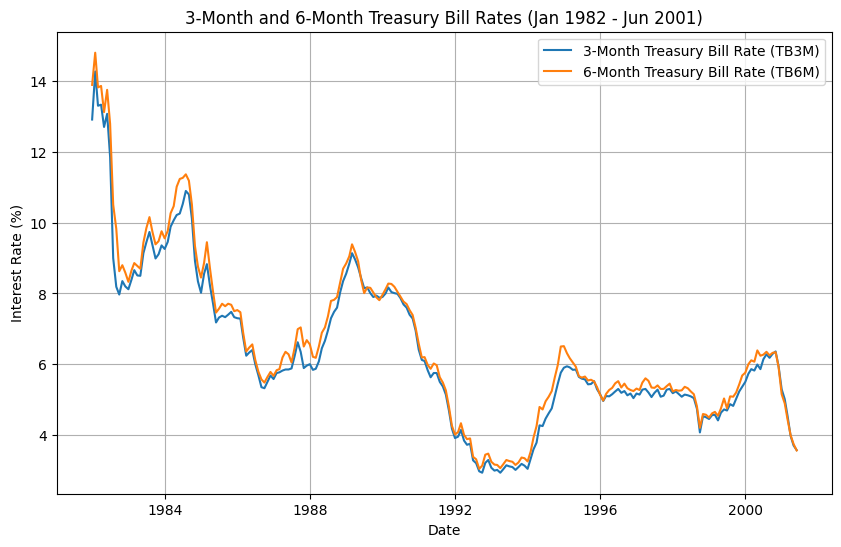

Observation: The two series appear to move together closely over time, suggesting a possible long-run relationship.

(b) Unit Root Analysis:

ADF Test for TB3M:
ADF Statistic: -1.5391858164849086
p-value: 0.514045363282407
Critical Values: {'1%': -3.460018927623594, '5%': -2.8745897386146817, '10%': -2.57372514086348}
TB3M is non-stationary (fail to reject null hypothesis of unit root).

ADF Test for TB6M:
ADF Statistic: -3.7738194363438047
p-value: 0.003186826077188909
Critical Values: {'1%': -3.458854867412691, '5%': -2.8740800599399323, '10%': -2.573453223097503}
TB6M is stationary (reject null hypothesis of unit root).

ADF Test for First Difference of TB3M:
ADF Statistic: -5.573440308131572
p-value: 1.449964833915459e-06
Critical Values: {'1%': -3.460018927623594, '5%': -2.8745897386146817, '10%': -2.57372514086348}
First Difference of TB3M is stationary (reject null hypothesis of unit root).

ADF Test for First Difference of TB6M:
ADF Statistic: -7.98179332631351
p-value: 2.61150

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, coint
from statsmodels.tsa.vector_ar.var_model import VAR
from google.colab import files
import io

# Function to upload and process the file in Colab
def upload_file():
    uploaded = files.upload()
    if not uploaded:
        print("No file uploaded.")
        return None
    file_name = list(uploaded.keys())[0]
    raw_content = uploaded[file_name].decode('utf-8')
    print("\nRaw file content (first 500 characters):\n", raw_content[:500])

    try:
        # Read the file without filtering yet
        data = pd.read_csv(io.BytesIO(uploaded[file_name]), sep='\t', skiprows=8)
        print("\nColumns detected:", data.columns.tolist())
        data.columns = [col.strip() for col in data.columns]
        print("\nUnfiltered DataFrame (first 5 rows):\n", data.head())

        # Identify columns with actual data (non-NaN)
        numeric_cols = [col for col in data.columns if pd.api.types.is_numeric_dtype(data[col]) and not data[col].isna().all()]
        print("\nColumns with numeric data:", numeric_cols)

        # Assume 'obs' is the date column, and the next two numeric columns are GS3M and GS6M
        if len(numeric_cols) < 2:
            raise ValueError("Not enough numeric columns found for TB3M and TB6M.")
        data = data[['obs'] + numeric_cols[:2]]  # Select obs and the first two numeric columns
        data.columns = ['obs', 'TB3M', 'TB6M']  # Rename directly
        data = data.dropna(how='all')  # Remove fully empty rows
        data['obs'] = pd.to_datetime(data['obs'], format='%Y:%m')
        data.set_index('obs', inplace=True)
        print("\nProcessed DataFrame (first 5 rows):\n", data.head())

        # Check for empty columns
        if data['TB3M'].isna().all() or data['TB6M'].isna().all():
            raise ValueError("One or both columns (TB3M, TB6M) contain no valid data.")
    except Exception as e:
        print(f"Error reading file: {e}")
        return None
    return data

# Function to plot time series
def plot_time_series(data):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['TB3M'], label='3-Month Treasury Bill Rate (TB3M)')
    plt.plot(data.index, data['TB6M'], label='6-Month Treasury Bill Rate (TB6M)')
    plt.title('3-Month and 6-Month Treasury Bill Rates (Jan 1982 - Jun 2001)')
    plt.xlabel('Date')
    plt.ylabel('Interest Rate (%)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to perform ADF test for stationarity
def adf_test(series, name):
    series_clean = series.dropna()
    if len(series_clean) == 0:
        print(f"\nADF Test for {name}: No valid data available (all NaN or empty).")
        return
    result = adfuller(series_clean)
    print(f'\nADF Test for {name}:')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values: {result[4]}')
    if result[1] < 0.05:
        print(f'{name} is stationary (reject null hypothesis of unit root).')
    else:
        print(f'{name} is non-stationary (fail to reject null hypothesis of unit root).')

# Function to check cointegration
def cointegration_test(series1, series2):
    series1_clean = series1.dropna()
    series2_clean = series2.dropna()
    if len(series1_clean) == 0 or len(series2_clean) == 0:
        print("\nCointegration Test: Insufficient valid data in one or both series.")
        return
    score, p_value, _ = coint(series1_clean, series2_clean)
    print('\nCointegration Test:')
    print(f'Cointegration Test Statistic: {score}')
    print(f'p-value: {p_value}')
    if p_value < 0.05:
        print('The two series are cointegrated (reject null hypothesis of no cointegration).')
    else:
        print('The two series are not cointegrated (fail to reject null hypothesis of no cointegration).')

# Main analysis function
def analyze_data():
    data = upload_file()
    if data is None:
        return

    # a. Plot the two time series
    print("\n(a) Plotting the two time series:")
    plot_time_series(data)
    print("Observation: The two series appear to move together closely over time, suggesting a possible long-run relationship.")

    # b. Unit root analysis (ADF test)
    print("\n(b) Unit Root Analysis:")
    adf_test(data['TB3M'], 'TB3M')
    adf_test(data['TB6M'], 'TB6M')

    # First differences for stationarity check if needed
    diff_tb3m = data['TB3M'].diff().dropna()
    diff_tb6m = data['TB6M'].diff().dropna()
    adf_test(diff_tb3m, 'First Difference of TB3M')
    adf_test(diff_tb6m, 'First Difference of TB6M')

    # c. Cointegration test
    print("\n(c) Cointegration Analysis:")
    cointegration_test(data['TB3M'], data['TB6M'])

    # d. Economic meaning of cointegration
    print("\n(d) Economic Meaning of Cointegration:")
    print("If TB3M and TB6M are cointegrated, it means there is a stable long-run relationship between the 3-month and 6-month Treasury bill rates. This could reflect market expectations or term structure of interest rates where short-term rates are linked to longer short-term rates (e.g., via the expectations hypothesis).")
    print("If not cointegrated, the two rates may drift apart over time, implying no consistent long-run equilibrium relationship, possibly due to differing market dynamics or policy effects.")

    # e. VAR model estimation
    print("\n(e) VAR Model with Four Lags:")
    print("If the series are non-stationary but cointegrated, you can estimate a VAR in levels (or use a VECM). If they are non-stationary and not cointegrated, you should use first differences to ensure stationarity.")
    if adfuller(data['TB3M'].dropna())[1] > 0.05 and adfuller(data['TB6M'].dropna())[1] > 0.05:
        if coint(data['TB3M'].dropna(), data['TB6M'].dropna())[1] < 0.05:
            print("Since series are cointegrated, use levels in a VAR or VECM.")
            model = VAR(data.dropna())
            results = model.fit(4)  # 4 lags
            print(results.summary())
        else:
            print("Since series are not cointegrated, use first differences in VAR.")
            diff_data = data.diff().dropna()
            model = VAR(diff_data)
            results = model.fit(4)  # 4 lags
            print(results.summary())
    else:
        print("Series are stationary, use levels in VAR.")
        model = VAR(data.dropna())
        results = model.fit(4)  # 4 lags
        print(results.summary())

if __name__ == "__main__":
    analyze_data()